In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('all_matches_ipl.csv')

In [3]:
df1 = df[(df['season'] == 2021) & (df['venue'].isin(['Zayed Cricket Stadium, Abu Dhabi','Dubai International Cricket Stadium','Sharjah Cricket Stadium']))]

In [4]:
def Phase(ball):
    if ball <= 5.8:
        return 'Powerplay'
    elif ball < 15.8:
        return 'Middle'
    else: 
        return 'Death'

In [5]:
df1['Phase'] = df.apply(lambda x: Phase(x['ball']), axis = 1)

In [6]:
def bowler_wk(player_dismissed, wicket_type):
    if type(player_dismissed) == str:
        if wicket_type not in ['run out', 'retired hurt', 'obstructing the field', 'nan']:
            return 1
        else:
            return 0
        
    else:
        return 0

In [7]:
df1['Bowler_wk'] = df.apply(lambda x: bowler_wk(x['player_dismissed'], x['wicket_type']), axis = 1)

In [8]:
def Strike_rate(Runs, Balls):
    return Runs/Balls


def Runs_per_innings(Runs,Innings):
    return Runs/Innings

def Balls_per_boundary(Balls, boundaries):
    if boundaries>0:
        return Balls/boundaries
    else:
        return Balls/1
    
def Balls_per_dismissal(Balls, Dismissals):
    if Dismissals>0:
        return Balls/Dismissals
    else:
        return Balls/1
    
def strike_rotation(Ones,Threes,Balls):
    return 100*(Ones+Threes)/Balls
    
def Boundary_percentage(Fours, Sixes, Balls):
    return 100*((Fours+ Sixes)/Balls)

def Dot_percent(Dots, Balls):
    return 100*Dots/Balls

def Runs_per_over(Runs, Balls):
    return 6*Runs/Balls

In [9]:
def Phases_of_play(df, current_phase):
    df = df[df.Phase == current_phase]
    
    df['is_dot'] = df.runs_off_bat.apply(lambda x: 1 if x == 0 else 0)
    df['is_one'] = df.runs_off_bat.apply(lambda x: 1 if x == 1 else 0)
    df['is_two'] = df.runs_off_bat.apply(lambda x: 1 if x == 2 else 0)
    df['is_three'] = df.runs_off_bat.apply(lambda x: 1 if x == 3 else 0)
    df['is_four'] = df.runs_off_bat.apply(lambda x: 1 if x == 4 else 0)
    df['is_six'] = df.runs_off_bat.apply(lambda x: 1 if x == 6 else 0)
    
    runs = df.groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns = {'runs_off_bat':'Runs'})
    balls = df.groupby(['striker'])['ball'].count().reset_index().rename(columns = {'ball':'Balls'})
    dismissals = df.groupby(['striker'])['Bowler_wk'].sum().reset_index().rename(columns = {'Bowler_wk':'Dismissals'})
    innings = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns = {"match_id": "Innings"})

    dots = df.groupby(['striker'])['is_dot'].sum().reset_index().rename(columns = {'is_dot':'Dots'})
    ones = df.groupby(['striker'])['is_one'].sum().reset_index().rename(columns = {'is_one':'Ones'})
    twos = df.groupby(['striker'])['is_two'].sum().reset_index().rename(columns = {'is_two':'Twos'})
    threes = df.groupby(['striker'])['is_three'].sum().reset_index().rename(columns = {'is_three':'Threes'})
    fours = df.groupby(['striker'])['is_four'].sum().reset_index().rename(columns = {'is_four':'Fours'})
    sixes = df.groupby(['striker'])['is_six'].sum().reset_index().rename(columns = {'is_six':'Sixes'})
            
    df = pd.merge(innings, runs, on = ['striker']).merge(balls, on ='striker').merge(dismissals, on = ['striker']).merge(dots, on = ['striker']).merge(ones, on = ['striker']).merge(twos, on = ['striker']).merge(threes, on = ['striker']).merge(fours, on = ['striker']).merge(sixes, on = ['striker'])

    df['SR'] = df.apply(lambda x: 100*Strike_rate(x['Runs'], x['Balls']), axis = 1)
    df['RPI'] = df.apply(lambda x: Runs_per_innings(x['Runs'], x['Innings']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_per_boundary(x['Balls'], x['Fours']+ x['Sixes']), axis = 1)
    df['BPD'] = df.apply(lambda x:Balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)
    df['Dot_percent'] = df.apply(lambda x: Dot_percent(x['Dots'], x['Balls']), axis = 1)
    df['RPO'] = df.apply(lambda x: Runs_per_over(x['Runs'], x['Balls']), axis = 1)
    return df

In [10]:
Powerplay = Phases_of_play(df1, 'Powerplay').sort_values(by = 'Runs', ascending = False)
Powerplay

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPB,BPD,Dot_percent,RPO
51,VR Iyer,10,212,172,3,80,50,10,0,25,7,123.255814,21.200000,5.375000,57.333333,46.511628,7.395349
49,Shubman Gill,10,187,154,3,62,56,9,1,23,3,121.428571,18.700000,5.923077,51.333333,40.259740,7.285714
36,RD Gaikwad,9,184,150,2,66,49,8,1,20,6,122.666667,20.444444,5.769231,75.000000,44.000000,7.360000
19,KL Rahul,6,151,116,1,43,47,6,0,14,6,130.172414,25.166667,5.800000,116.000000,37.068966,7.810345
14,F du Plessis,9,144,117,3,53,38,3,0,19,4,123.076923,16.000000,5.086957,39.000000,45.299145,7.384615
50,V Kohli,8,143,106,3,44,34,5,1,18,4,134.905660,17.875000,4.818182,35.333333,41.509434,8.094340
40,S Dhawan,8,142,116,3,57,36,0,0,16,7,122.413793,17.750000,5.043478,38.666667,49.137931,7.344828
8,D Padikkal,8,137,126,5,65,34,5,1,18,3,108.730159,17.125000,6.000000,25.200000,51.587302,6.523810
12,E Lewis,5,134,79,4,31,22,3,0,16,7,169.620253,26.800000,3.434783,19.750000,39.240506,10.177215
33,PP Shaw,7,130,91,5,37,26,8,0,16,4,142.857143,18.571429,4.550000,18.200000,40.659341,8.571429


In [11]:
Middle = Phases_of_play(df1, 'Middle').sort_values(by = 'Runs', ascending = False)
Middle

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPB,BPD,Dot_percent,RPO
19,GJ Maxwell,7,196,158,1,57,68,10,0,15,8,124.050633,28.000000,6.869565,158.000000,36.075949,7.443038
63,RD Gaikwad,7,185,136,4,36,70,9,1,13,7,136.029412,26.428571,6.800000,34.000000,26.470588,8.161765
87,VR Iyer,7,158,127,6,44,60,4,0,12,7,124.409449,22.571429,6.684211,21.166667,34.645669,7.464567
85,Shubman Gill,6,158,143,4,56,59,10,1,13,4,110.489510,26.333333,8.411765,35.750000,39.160839,6.629371
81,SV Samson,6,134,98,4,33,40,8,0,12,5,136.734694,22.333333,5.764706,24.500000,33.673469,8.204082
32,KL Rahul,5,131,92,3,23,49,7,0,5,8,142.391304,26.200000,7.076923,30.666667,25.000000,8.543478
51,N Rana,9,130,126,4,52,56,5,0,7,6,103.174603,14.444444,9.692308,31.500000,41.269841,6.190476
62,RA Tripathi,7,130,89,5,26,38,8,0,13,4,146.067416,18.571429,5.235294,17.800000,29.213483,8.764045
3,AK Markram,6,128,106,4,33,52,7,0,11,3,120.754717,21.333333,7.571429,26.500000,31.132075,7.245283
17,F du Plessis,6,115,102,4,33,49,10,0,7,3,112.745098,19.166667,10.200000,25.500000,32.352941,6.764706


In [12]:
Death = Phases_of_play(df1, 'Death').sort_values(by = ['Runs','SR'], ascending = [False, False])
Death

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPB,BPD,Dot_percent,RPO
23,GJ Maxwell,6,94,53,4,17,14,7,0,12,3,177.358491,15.666667,3.533333,13.250000,32.075472,10.641509
64,RD Gaikwad,3,70,33,1,8,12,2,0,6,5,212.121212,23.333333,3.000000,33.000000,24.242424,12.727273
35,KD Karthik,6,70,52,4,16,22,6,0,6,2,134.615385,11.666667,6.500000,13.000000,30.769231,8.076923
74,SO Hetmyer,5,67,43,3,16,13,5,0,5,4,155.813953,13.400000,4.777778,14.333333,37.209302,9.348837
65,RR Pant,3,66,42,0,13,14,6,0,7,2,157.142857,22.000000,4.666667,42.000000,30.952381,9.428571
61,RA Jadeja,5,60,34,2,10,12,3,0,6,3,176.470588,12.000000,3.777778,17.000000,29.411765,10.588235
67,Rashid Khan,6,60,53,3,22,20,3,0,7,1,113.207547,10.000000,6.625000,17.666667,41.509434,6.792453
19,F du Plessis,2,54,28,2,7,10,3,0,5,3,192.857143,27.000000,3.500000,14.000000,25.000000,11.571429
0,AB de Villiers,5,52,27,2,12,6,0,0,4,5,192.592593,10.400000,3.000000,13.500000,44.444444,11.555556
53,N Rana,4,52,30,2,8,12,2,0,6,2,173.333333,13.000000,3.750000,15.000000,26.666667,10.400000


In [13]:
import plotly.express as px


In [14]:
Powerplay_1 = Powerplay[(Powerplay['Innings'] >= 5) & (Powerplay['Runs'] >= 65)]
Powerplay_1['phase'] = 'Powerplay'
Powerplay_1

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPB,BPD,Dot_percent,RPO,phase
51,VR Iyer,10,212,172,3,80,50,10,0,25,7,123.255814,21.200000,5.375000,57.333333,46.511628,7.395349,Powerplay
49,Shubman Gill,10,187,154,3,62,56,9,1,23,3,121.428571,18.700000,5.923077,51.333333,40.259740,7.285714,Powerplay
36,RD Gaikwad,9,184,150,2,66,49,8,1,20,6,122.666667,20.444444,5.769231,75.000000,44.000000,7.360000,Powerplay
19,KL Rahul,6,151,116,1,43,47,6,0,14,6,130.172414,25.166667,5.800000,116.000000,37.068966,7.810345,Powerplay
14,F du Plessis,9,144,117,3,53,38,3,0,19,4,123.076923,16.000000,5.086957,39.000000,45.299145,7.384615,Powerplay
50,V Kohli,8,143,106,3,44,34,5,1,18,4,134.905660,17.875000,4.818182,35.333333,41.509434,8.094340,Powerplay
40,S Dhawan,8,142,116,3,57,36,0,0,16,7,122.413793,17.750000,5.043478,38.666667,49.137931,7.344828,Powerplay
8,D Padikkal,8,137,126,5,65,34,5,1,18,3,108.730159,17.125000,6.000000,25.200000,51.587302,6.523810,Powerplay
12,E Lewis,5,134,79,4,31,22,3,0,16,7,169.620253,26.800000,3.434783,19.750000,39.240506,10.177215,Powerplay
33,PP Shaw,7,130,91,5,37,26,8,0,16,4,142.857143,18.571429,4.550000,18.200000,40.659341,8.571429,Powerplay


In [15]:
Middle_1 = Middle[(Middle['Innings'] >= 5) & (Middle['Runs'] >= 80)]
Middle_1['phase'] = 'Middle'
Middle_1.to_excel('IPL2021_Middle.xlsx')

In [16]:
Death_1 = Death[(Death['Innings'] >= 3) & (Death['Runs'] >= 45)]
Death_1['phase'] = 'Death'
Death_1.to_excel('IPL2021_Middle.xlsx')
Death_1

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPB,BPD,Dot_percent,RPO,phase
23,GJ Maxwell,6,94,53,4,17,14,7,0,12,3,177.358491,15.666667,3.533333,13.250000,32.075472,10.641509,Death
64,RD Gaikwad,3,70,33,1,8,12,2,0,6,5,212.121212,23.333333,3.000000,33.000000,24.242424,12.727273,Death
35,KD Karthik,6,70,52,4,16,22,6,0,6,2,134.615385,11.666667,6.500000,13.000000,30.769231,8.076923,Death
74,SO Hetmyer,5,67,43,3,16,13,5,0,5,4,155.813953,13.400000,4.777778,14.333333,37.209302,9.348837,Death
65,RR Pant,3,66,42,0,13,14,6,0,7,2,157.142857,22.000000,4.666667,42.000000,30.952381,9.428571,Death
61,RA Jadeja,5,60,34,2,10,12,3,0,6,3,176.470588,12.000000,3.777778,17.000000,29.411765,10.588235,Death
67,Rashid Khan,6,60,53,3,22,20,3,0,7,1,113.207547,10.000000,6.625000,17.666667,41.509434,6.792453,Death
0,AB de Villiers,5,52,27,2,12,6,0,0,4,5,192.592593,10.400000,3.000000,13.500000,44.444444,11.555556,Death
53,N Rana,4,52,30,2,8,12,2,0,6,2,173.333333,13.000000,3.750000,15.000000,26.666667,10.400000,Death
5,AT Rayudu,3,49,33,1,14,9,3,0,4,3,148.484848,16.333333,4.714286,33.000000,42.424242,8.909091,Death


In [17]:
df2 = pd.concat([Powerplay_1, Middle_1, Death_1])
df2

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPB,BPD,Dot_percent,RPO,phase
51,VR Iyer,10,212,172,3,80,50,10,0,25,7,123.255814,21.200000,5.375000,57.333333,46.511628,7.395349,Powerplay
49,Shubman Gill,10,187,154,3,62,56,9,1,23,3,121.428571,18.700000,5.923077,51.333333,40.259740,7.285714,Powerplay
36,RD Gaikwad,9,184,150,2,66,49,8,1,20,6,122.666667,20.444444,5.769231,75.000000,44.000000,7.360000,Powerplay
19,KL Rahul,6,151,116,1,43,47,6,0,14,6,130.172414,25.166667,5.800000,116.000000,37.068966,7.810345,Powerplay
14,F du Plessis,9,144,117,3,53,38,3,0,19,4,123.076923,16.000000,5.086957,39.000000,45.299145,7.384615,Powerplay
50,V Kohli,8,143,106,3,44,34,5,1,18,4,134.905660,17.875000,4.818182,35.333333,41.509434,8.094340,Powerplay
40,S Dhawan,8,142,116,3,57,36,0,0,16,7,122.413793,17.750000,5.043478,38.666667,49.137931,7.344828,Powerplay
8,D Padikkal,8,137,126,5,65,34,5,1,18,3,108.730159,17.125000,6.000000,25.200000,51.587302,6.523810,Powerplay
12,E Lewis,5,134,79,4,31,22,3,0,16,7,169.620253,26.800000,3.434783,19.750000,39.240506,10.177215,Powerplay
33,PP Shaw,7,130,91,5,37,26,8,0,16,4,142.857143,18.571429,4.550000,18.200000,40.659341,8.571429,Powerplay


In [18]:
df2.to_excel('IPL_2021.xlsx')

In [19]:
Powerplay_1.striker.unique()
Powerplay_1 = Powerplay_1.reset_index()

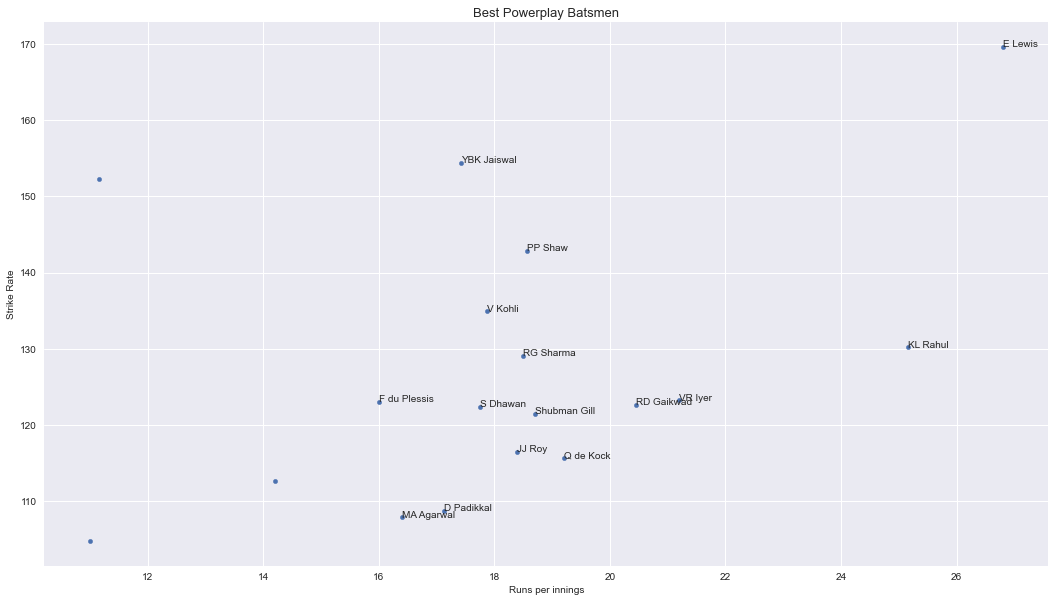

In [20]:
Powerplay_1.plot(kind = 'scatter', x = 'RPI', y = 'SR',figsize = (18,10))
selected_batsman = ['VR Iyer', 'Shubman Gill', 'RD Gaikwad', 'KL Rahul',
       'F du Plessis', 'V Kohli', 'S Dhawan', 'D Padikkal', 'E Lewis',
       'PP Shaw', 'YBK Jaiswal', 'RG Sharma', 'Q de Kock', 'JJ Roy',
       'MA Agarwal']
annotations = list(Powerplay_1['striker'])
    
plt.xlabel('RPI')
for i,j in enumerate(annotations):
    if j in selected_batsman:
        plt.annotate(j,(Powerplay_1['RPI'][i], Powerplay_1['SR'][i]))

plt.title('Best Powerplay Batsmen', fontsize = 13)
plt.xlabel('Runs per innings',fontsize = 10)
plt.ylabel('Strike Rate',fontsize = 10)
plt.show()

In [ ]:
## Team wise analysis

In [21]:
    df1['is_dot'] = df1.runs_off_bat.apply(lambda x: 1 if x == 0 else 0)
    df1['is_one'] = df1.runs_off_bat.apply(lambda x: 1 if x == 1 else 0)
    df1['is_two'] = df1.runs_off_bat.apply(lambda x: 1 if x == 2 else 0)
    df1['is_three'] = df1.runs_off_bat.apply(lambda x: 1 if x == 3 else 0)
    df1['is_four'] = df1.runs_off_bat.apply(lambda x: 1 if x == 4 else 0)
    df1['is_six'] =df1.runs_off_bat.apply(lambda x: 1 if x == 6 else 0)

In [22]:
df1.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six
200664,1254104,2021,2021-09-19,Dubai International Cricket Stadium,1,0.1,Chennai Super Kings,Mumbai Indians,RD Gaikwad,F du Plessis,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0


In [23]:
def wicket(player_dismissed):
    if type(player_dismissed) == str:
        return 1
    else:
        return 0
    
def Total_runs(runs_off_bat, extras):
    return runs_off_bat + extras 

In [24]:
df1['wicket'] = df1.apply(lambda x: wicket(x['player_dismissed']), axis = 1)

In [25]:
df1['total_runs'] = df1.apply(lambda x: Total_runs(x['extras'], x['runs_off_bat']), axis = 1)

In [26]:
team_1 = df1.groupby(['batting_team','Phase'])['total_runs','is_six','is_four','wicket','is_one','is_three','is_dot'].sum()

In [27]:
team_2 = df1.groupby(['batting_team','Phase'])['ball'].count()

In [28]:
team_stats = pd.merge(team_1, team_2, on = ['batting_team','Phase'])[['total_runs','ball','wicket','is_four','is_six','is_one','is_three','is_dot']]
team_stats

total_runs  ball  wicket  is_four  \
batting_team                Phase                                          
Chennai Super Kings         Death             389   214      13       32   
                            Middle            646   559      24       40   
                            Powerplay         413   332      10       46   
Delhi Capitals              Death             277   191      10       20   
                            Middle            530   493      23       33   
                            Powerplay         355   296      12       38   
Kolkata Knight Riders       Death             236   186      19       16   
                            Middle            728   580      27       51   
                            Powerplay         485   376       8       55   
Mumbai Indians              Death             201   136      16       21   
                            Middle            439   390      22       27   
                            Powerplay         357   260       9       45   
Punjab Kings                Death             154   121       8        7   
                            Middle            492   359      19       30   
                            Powerplay         262   224       5       23   
Rajasthan Royals            Death             141   140      16        8   
                            Middle            521   432      24       35   
                            Powerplay         322   255      12       38   
Royal Challengers Bangalore Death             259   176      19       22   
                            Middle            540   493      20       33   
                            Powerplay         372   303       9       41   
Sunrisers Hyderabad         Death             220   169      16       19   
                            Middle            473   435      23       21   
                            Powerplay         311   258      10       37   

                                       is_six  is_one  is_three  is_dot  
batting_team                Phase                                        
Chennai Super Kings         Death          23      71         1      71  
                            Middle         18     272         1     188  
                            Powerplay      12     103         1     156  
Delhi Capitals              Death          10      78         0      65  
                            Middle         11     240         2     175  
                            Powerplay      13      92         0     141  
Kolkata Knight Riders       Death           9      68         0      80  
                            Middle         29     246         1     219  
                            Powerplay      12     121         1     162  
Mumbai Indians              Death           9      38         0      60  
                            Middle         14     185         1     146  
                            Powerplay      10      66         2     119  
Punjab Kings                Death           7      46         1      46  
                            Middle         20     173         0     108  
                            Powerplay       9      84         1      98  
Rajasthan Royals            Death           3      52         0      64  
                            Middle         24     175         0     177  
                            Powerplay      11      72         2     121  
Royal Challengers Bangalore Death          11      58         0      67  
                            Middle         16     217         1     192  
                            Powerplay       9      96         2     143  
Sunrisers Hyderabad         Death           8      69         0      65  
                            Middle         13     214         1     152  
                            Powerplay       6      65         3     134

In [29]:
team_stats['Strike_rate'] = 100*team_stats['total_runs']/team_stats['ball']
team_stats['BPB'] = team_stats['ball']/(team_stats['is_four'] + team_stats['is_six'])
team_stats['runs_per_dismissal'] = team_stats['total_runs']/team_stats['wicket']
team_stats['Runs_per_over'] = 6*team_stats['total_runs']/team_stats['ball']

In [30]:
team_stats = team_stats.round(2).reset_index()

In [31]:
team_stats[team_stats['Phase'] == 'Powerplay'].set_index('Phase')

,batting_team,total_runs,ball,wicket,is_four,is_six,is_one,is_three,is_dot,Strike_rate,BPB,runs_per_dismissal,Runs_per_over
Phase,,,,,,,,,,,,,
Powerplay,Chennai Super Kings,413,332,10,46,12,103,1,156,124.40,5.72,41.30,7.46
Powerplay,Delhi Capitals,355,296,12,38,13,92,0,141,119.93,5.80,29.58,7.20
Powerplay,Kolkata Knight Riders,485,376,8,55,12,121,1,162,128.99,5.61,60.62,7.74
Powerplay,Mumbai Indians,357,260,9,45,10,66,2,119,137.31,4.73,39.67,8.24
Powerplay,Punjab Kings,262,224,5,23,9,84,1,98,116.96,7.00,52.40,7.02
Powerplay,Rajasthan Royals,322,255,12,38,11,72,2,121,126.27,5.20,26.83,7.58
Powerplay,Royal Challengers Bangalore,372,303,9,41,9,96,2,143,122.77,6.06,41.33,7.37
Powerplay,Sunrisers Hyderabad,311,258,10,37,6,65,3,134,120.54,6.00,31.10,7.23


In [32]:
team_stats[team_stats['Phase'] == 'Middle'].set_index('Phase')

,batting_team,total_runs,ball,wicket,is_four,is_six,is_one,is_three,is_dot,Strike_rate,BPB,runs_per_dismissal,Runs_per_over
Phase,,,,,,,,,,,,,
Middle,Chennai Super Kings,646,559,24,40,18,272,1,188,115.56,9.64,26.92,6.93
Middle,Delhi Capitals,530,493,23,33,11,240,2,175,107.51,11.20,23.04,6.45
Middle,Kolkata Knight Riders,728,580,27,51,29,246,1,219,125.52,7.25,26.96,7.53
Middle,Mumbai Indians,439,390,22,27,14,185,1,146,112.56,9.51,19.95,6.75
Middle,Punjab Kings,492,359,19,30,20,173,0,108,137.05,7.18,25.89,8.22
Middle,Rajasthan Royals,521,432,24,35,24,175,0,177,120.60,7.32,21.71,7.24
Middle,Royal Challengers Bangalore,540,493,20,33,16,217,1,192,109.53,10.06,27.00,6.57
Middle,Sunrisers Hyderabad,473,435,23,21,13,214,1,152,108.74,12.79,20.57,6.52


In [33]:
team_stats[team_stats['Phase'] == 'Death'].set_index('Phase')

,batting_team,total_runs,ball,wicket,is_four,is_six,is_one,is_three,is_dot,Strike_rate,BPB,runs_per_dismissal,Runs_per_over
Phase,,,,,,,,,,,,,
Death,Chennai Super Kings,389,214,13,32,23,71,1,71,181.78,3.89,29.92,10.91
Death,Delhi Capitals,277,191,10,20,10,78,0,65,145.03,6.37,27.70,8.70
Death,Kolkata Knight Riders,236,186,19,16,9,68,0,80,126.88,7.44,12.42,7.61
Death,Mumbai Indians,201,136,16,21,9,38,0,60,147.79,4.53,12.56,8.87
Death,Punjab Kings,154,121,8,7,7,46,1,46,127.27,8.64,19.25,7.64
Death,Rajasthan Royals,141,140,16,8,3,52,0,64,100.71,12.73,8.81,6.04
Death,Royal Challengers Bangalore,259,176,19,22,11,58,0,67,147.16,5.33,13.63,8.83
Death,Sunrisers Hyderabad,220,169,16,19,8,69,0,65,130.18,6.26,13.75,7.81


In [34]:
pd.concat([team_stats[team_stats['Phase'] == 'Powerplay'].set_index('Phase'), team_stats[team_stats['Phase'] == 'Middle'].set_index('Phase'), team_stats[team_stats['Phase'] == 'Death'].set_index('Phase')]).to_excel('IPL2021_matchinfo.xlsx')

In [ ]:
## Overall Stats

In [89]:
def batsman_stats(df):
    
    df['is_dot'] = df.runs_off_bat.apply(lambda x: 1 if x == 0 else 0)
    df['is_one'] = df.runs_off_bat.apply(lambda x: 1 if x == 1 else 0)
    df['is_two'] = df.runs_off_bat.apply(lambda x: 1 if x == 2 else 0)
    df['is_three'] = df.runs_off_bat.apply(lambda x: 1 if x == 3 else 0)
    df['is_four'] = df.runs_off_bat.apply(lambda x: 1 if x == 4 else 0)
    df['is_six'] = df.runs_off_bat.apply(lambda x: 1 if x == 6 else 0)
    
    runs = df.groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns = {'runs_off_bat':'Runs'})
    balls = df.groupby(['striker'])['ball'].count().reset_index().rename(columns = {'ball':'Balls'})
    dismissals = df.groupby(['striker'])['wicket'].sum().reset_index().rename(columns = {'wicket':'Dismissals'})
    innings = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns = {"match_id": "Innings"})

    dots = df.groupby(['striker'])['is_dot'].sum().reset_index().rename(columns = {'is_dot':'Dots'})
    ones = df.groupby(['striker'])['is_one'].sum().reset_index().rename(columns = {'is_one':'Ones'})
    twos = df.groupby(['striker'])['is_two'].sum().reset_index().rename(columns = {'is_two':'Twos'})
    threes = df.groupby(['striker'])['is_three'].sum().reset_index().rename(columns = {'is_three':'Threes'})
    fours = df.groupby(['striker'])['is_four'].sum().reset_index().rename(columns = {'is_four':'Fours'})
    sixes = df.groupby(['striker'])['is_six'].sum().reset_index().rename(columns = {'is_six':'Sixes'})
            
    df = pd.merge(innings, runs, on = ['striker']).merge(balls, on ='striker').merge(dismissals, on = ['striker']).merge(dots, on = ['striker']).merge(ones, on = ['striker']).merge(twos, on = ['striker']).merge(threes, on = ['striker']).merge(fours, on = ['striker']).merge(sixes, on = ['striker'])

    df['SR'] = df.apply(lambda x: 100*Strike_rate(x['Runs'], x['Balls']), axis = 1)
    df['RPI'] = df.apply(lambda x: Runs_per_innings(x['Runs'], x['Innings']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_per_boundary(x['Balls'], x['Fours']+ x['Sixes']), axis = 1)
    df['BPD'] = df.apply(lambda x:Balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)
    df['Dot_percent'] = df.apply(lambda x: Dot_percent(x['Dots'], x['Balls']), axis = 1)
    df['RPO'] = df.apply(lambda x: Runs_per_over(x['Runs'], x['Balls']), axis = 1)
    return df

In [90]:
batsman_stats(df1).sort_values(by = 'Runs', ascending = False)

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPB,BPD,Dot_percent,RPO
80,RD Gaikwad,9,439,319,8,110,131,19,2,39,18,137.617555,48.777778,5.596491,39.875000,34.482759,8.257053
114,VR Iyer,10,370,299,9,124,110,14,0,37,14,123.745819,37.000000,5.862745,33.222222,41.471572,7.424749
106,Shubman Gill,10,346,302,10,122,116,19,2,36,7,114.569536,34.600000,7.023256,30.200000,40.397351,6.874172
24,F du Plessis,9,313,247,9,93,97,16,0,31,10,126.720648,34.777778,6.024390,27.444444,37.651822,7.603239
45,KL Rahul,6,295,218,5,69,101,13,0,21,14,135.321101,49.166667,6.228571,43.600000,31.651376,8.119266
28,GJ Maxwell,8,290,211,5,74,82,17,0,27,11,137.440758,36.250000,5.552632,42.200000,35.071090,8.246445
15,D Padikkal,8,216,207,9,96,71,12,1,22,5,104.347826,27.000000,7.666667,23.000000,46.376812,6.260870
78,RA Tripathi,9,210,147,7,47,58,15,0,20,7,142.857143,23.333333,5.444444,21.000000,31.972789,8.571429
100,SV Samson,7,207,172,6,66,67,14,0,19,6,120.348837,29.571429,6.880000,28.666667,38.372093,7.220930
86,S Dhawan,8,207,189,8,87,70,3,1,20,8,109.523810,25.875000,6.750000,23.625000,46.031746,6.571429


# Phases of play for the top 4 highest run getters 

## Ruturaj Gaekwad's Phases of play

In [55]:
Gaikwad = df1[df1['striker'] == 'RD Gaikwad']

In [56]:
Gaikwad['match_id'].unique()

array([1254104, 1254113, 1254098, 1254091, 1254089, 1254110, 1254094,
       1254114, 1254117], dtype=int64)

In [57]:
Gaikwad_1 = Gaikwad[Gaikwad.match_id == 1254104]

In [58]:
Gaikwad_1['cumsum'] = Gaikwad_1['runs_off_bat'].cumsum()

In [59]:
Gaikwad_1['Balls'] = [i for i in range(1, len(Gaikwad_1) + 1)]

In [60]:
Gaikwad_2 = Gaikwad[Gaikwad.match_id == 1254113]
Gaikwad_2['cumsum'] = Gaikwad_2['runs_off_bat'].cumsum()
Gaikwad_2['Balls'] = [i for i in range(1, len(Gaikwad_2) + 1)]

In [61]:
Gaikwad_3 = Gaikwad[Gaikwad.match_id == 1254098]
Gaikwad_3['cumsum'] = Gaikwad_3['runs_off_bat'].cumsum()
Gaikwad_3['Balls'] = [i for i in range(1, len(Gaikwad_3) + 1)]

In [62]:
Gaikwad_4 = Gaikwad[Gaikwad.match_id == 1254091]
Gaikwad_4['cumsum'] = Gaikwad_4['runs_off_bat'].cumsum()
Gaikwad_4['Balls'] = [i for i in range(1, len(Gaikwad_4) + 1)]

In [63]:
Gaikwad_5 = Gaikwad[Gaikwad.match_id == 1254089]
Gaikwad_5['cumsum'] = Gaikwad_5['runs_off_bat'].cumsum()
Gaikwad_5['Balls'] = [i for i in range(1, len(Gaikwad_5) + 1)]

In [64]:
Gaikwad_6 = Gaikwad[Gaikwad.match_id == 1254110]
Gaikwad_6['cumsum'] = Gaikwad_6['runs_off_bat'].cumsum()
Gaikwad_6['Balls'] = [i for i in range(1, len(Gaikwad_6) + 1)]

In [65]:
Gaikwad_7 = Gaikwad[Gaikwad.match_id == 1254094]
Gaikwad_7['cumsum'] = Gaikwad_7['runs_off_bat'].cumsum()
Gaikwad_7['Balls'] = [i for i in range(1, len(Gaikwad_7) + 1)]

In [66]:
Gaikwad_8 = Gaikwad[Gaikwad.match_id == 1254114]
Gaikwad_8['cumsum'] = Gaikwad_8['runs_off_bat'].cumsum()
Gaikwad_8['Balls'] = [i for i in range(1, len(Gaikwad_8) + 1)]

In [67]:
Gaikwad_9 = Gaikwad[Gaikwad.match_id == 1254117]
Gaikwad_9['cumsum'] = Gaikwad_9['runs_off_bat'].cumsum()
Gaikwad_9['Balls'] = [i for i in range(1, len(Gaikwad_9) + 1)]

In [68]:
Gaikwad_total = pd.concat([Gaikwad_1,Gaikwad_2,Gaikwad_3,Gaikwad_4,Gaikwad_5,Gaikwad_6,Gaikwad_7,Gaikwad_8,Gaikwad_9])

In [70]:
def Phases(cumsum, Balls):
    if Balls <= 10:
        return 'Between 1-10 balls'
    if Balls <= 20:
        return 'Between 11-20 balls'
    if Balls <= 30:
        return 'Between 21-30 balls'
    if Balls <= 40:
        return 'Between 31-40 balls'
    if Balls <= 50:
        return 'Between 41-50 balls'
    if Balls <= 60:
        return 'Between 51-60 balls'
    if Balls <= 70:
        return 'Between 61-70 balls'
    if Balls <= 80:
        return 'Between 71-80 balls'

In [71]:
Gaikwad_total['Phases'] = Gaikwad_total.apply(lambda x: Phases(x['cumsum'], x['Balls']), axis = 1)

In [120]:
Gaikwad_total_1 = Gaikwad_total.groupby(['Phases'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [75]:
Gaikwad_total_2 = Gaikwad_total.groupby(['Phases'])['ball'].count()

In [76]:
Gaikwad_total_phase = pd.merge(Gaikwad_total_1,Gaikwad_total_2, on = 'Phases')

In [77]:
Gaikwad_total_phase

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,95,45,11,2,0,90
Between 11-20 balls,99,28,8,4,2,79
Between 21-30 balls,73,21,4,3,3,61
Between 31-40 balls,60,6,6,1,2,39
Between 41-50 balls,57,7,6,3,1,30
Between 51-60 balls,49,2,4,4,0,18
Between 61-70 balls,6,1,0,1,0,2


In [240]:
Gaikwad_total.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six,wicket,total_runs,cumsum,Balls,Phases
200664,1254104,2021,2021-09-19,Dubai International Cricket Stadium,1,0.1,Chennai Super Kings,Mumbai Indians,RD Gaikwad,F du Plessis,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,0,1,Between 1-10 balls


In [245]:
Gaikwad_venue_1 = Gaikwad_total.groupby(['Phases','venue'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [248]:
Gaikwad_venue_2 = Gaikwad_total.groupby(['Phases','venue'])['ball'].count()

In [249]:
pd.merge(Gaikwad_venue_1, Gaikwad_venue_2, on = ['Phases','venue'])

runs_off_bat  is_dot  \
Phases              venue                                                       
Between 1-10 balls  Dubai International Cricket Stadium            54      26   
                    Sharjah Cricket Stadium                        21       8   
                    Zayed Cricket Stadium, Abu Dhabi               20      11   
Between 11-20 balls Dubai International Cricket Stadium            41      12   
                    Sharjah Cricket Stadium                        29       8   
                    Zayed Cricket Stadium, Abu Dhabi               29       8   
Between 21-30 balls Dubai International Cricket Stadium            31       9   
                    Sharjah Cricket Stadium                        20       8   
                    Zayed Cricket Stadium, Abu Dhabi               22       4   
Between 31-40 balls Dubai International Cricket Stadium            31       2   
                    Sharjah Cricket Stadium                        13       2   
                    Zayed Cricket Stadium, Abu Dhabi               16       2   
Between 41-50 balls Dubai International Cricket Stadium            35       6   
                    Zayed Cricket Stadium, Abu Dhabi               22       1   
Between 51-60 balls Dubai International Cricket Stadium            23       1   
                    Zayed Cricket Stadium, Abu Dhabi               26       1   
Between 61-70 balls Zayed Cricket Stadium, Abu Dhabi                6       1   

                                                         is_four  is_six  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium        6       2   
                    Sharjah Cricket Stadium                    2       0   
                    Zayed Cricket Stadium, Abu Dhabi           3       0   
Between 11-20 balls Dubai International Cricket Stadium        4       0   
                    Sharjah Cricket Stadium                    2       2   
                    Zayed Cricket Stadium, Abu Dhabi           2       2   
Between 21-30 balls Dubai International Cricket Stadium        1       1   
                    Sharjah Cricket Stadium                    2       1   
                    Zayed Cricket Stadium, Abu Dhabi           1       1   
Between 31-40 balls Dubai International Cricket Stadium        2       1   
                    Sharjah Cricket Stadium                    2       0   
                    Zayed Cricket Stadium, Abu Dhabi           2       0   
Between 41-50 balls Dubai International Cricket Stadium        5       1   
                    Zayed Cricket Stadium, Abu Dhabi           1       2   
Between 51-60 balls Dubai International Cricket Stadium        2       2   
                    Zayed Cricket Stadium, Abu Dhabi           2       2   
Between 61-70 balls Zayed Cricket Stadium, Abu Dhabi           0       1   

                                                         wicket  ball  
Phases              venue                                              
Between 1-10 balls  Dubai International Cricket Stadium       0    50  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          0    20  
Between 11-20 balls Dubai International Cricket Stadium       2    39  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          0    20  
Between 21-30 balls Dubai International Cricket Stadium       1    27  
                    Sharjah Cricket Stadium                   1    16  
                    Zayed Cricket Stadium, Abu Dhabi          1    18  
Between 31-40 balls Dubai International Cricket Stadium       1    20  
                    Sharjah Cricket Stadium                   1     9  
                    Zayed Cricket Stadium, Abu Dhabi          0    10  
Between 41-50 balls Dubai International Cricket Stadium       1 

## Faf's Phase of play 

In [86]:
Faf = df1[df1['striker'] == 'F du Plessis']

In [91]:
Faf['match_id'].unique()

array([1254104, 1254113, 1254098, 1254091, 1254089, 1254110, 1254094,
       1254114, 1254117], dtype=int64)

In [99]:
Faf_1 = Faf[Faf['match_id'] == 1254104]
Faf_1['cumsum'] = Faf_1['runs_off_bat'].cumsum()
Faf_1['Balls'] = [i for i in range(1, len(Faf_1) + 1)]

In [101]:
Faf_2 = Faf[Faf['match_id'] == 1254113]
Faf_2['cumsum'] = Faf_2['runs_off_bat'].cumsum()
Faf_2['Balls'] = [i for i in range(1, len(Faf_2) + 1)]

In [102]:
Faf_3 = Faf[Faf['match_id'] == 1254098]
Faf_3['cumsum'] = Faf_3['runs_off_bat'].cumsum()
Faf_3['Balls'] = [i for i in range(1, len(Faf_3) + 1)]

In [103]:
Faf_4 = Faf[Faf['match_id'] == 1254091]
Faf_4['cumsum'] = Faf_4['runs_off_bat'].cumsum()
Faf_4['Balls'] = [i for i in range(1, len(Faf_4) + 1)]

In [104]:
Faf_5 = Faf[Faf['match_id'] == 1254089]
Faf_5['cumsum'] = Faf_5['runs_off_bat'].cumsum()
Faf_5['Balls'] = [i for i in range(1, len(Faf_5) + 1)]

In [105]:
Faf_6 = Faf[Faf['match_id'] == 1254110]
Faf_6['cumsum'] = Faf_6['runs_off_bat'].cumsum()
Faf_6['Balls'] = [i for i in range(1, len(Faf_6) + 1)]

In [106]:
Faf_7 = Faf[Faf['match_id'] == 1254094]
Faf_7['cumsum'] = Faf_7['runs_off_bat'].cumsum()
Faf_7['Balls'] = [i for i in range(1, len(Faf_7) + 1)]

In [107]:
Faf_8 = Faf[Faf['match_id'] == 1254114]
Faf_8['cumsum'] = Faf_8['runs_off_bat'].cumsum()
Faf_8['Balls'] = [i for i in range(1, len(Faf_8) + 1)]

In [108]:
Faf_9 = Faf[Faf['match_id'] == 1254117]
Faf_9['cumsum'] = Faf_9['runs_off_bat'].cumsum()
Faf_9['Balls'] = [i for i in range(1, len(Faf_9) + 1)]

In [109]:
faf_total = pd.concat([Faf_1,Faf_2,Faf_3,Faf_4,Faf_5,Faf_6,Faf_7,Faf_8,Faf_9])

In [112]:
faf_total['Phases'] = faf_total.apply(lambda x: Phases(x['cumsum'],x['Balls']), axis = 1)

In [114]:
faf_total_1 = faf_total.groupby(['Phases'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [115]:
faf_total_2 = faf_total.groupby(['Phases'])['ball'].count()

In [117]:
faf_total_phase = pd.merge(faf_total_1, faf_total_2, on = 'Phases')
faf_total_phase

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,79,38,10,2,3,74
Between 11-20 balls,83,19,9,3,1,59
Between 21-30 balls,50,14,3,1,2,46
Between 31-40 balls,32,10,3,1,1,26
Between 41-50 balls,23,7,2,0,0,20
Between 51-60 balls,46,3,4,3,0,20
Between 61-70 balls,0,2,0,0,2,2


In [251]:
faf_total.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six,wicket,total_runs,Balls,cumsum,Phases
200666,1254104,2021,2021-09-19,Dubai International Cricket Stadium,1,0.3,Chennai Super Kings,Mumbai Indians,F du Plessis,RD Gaikwad,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,1,0,Between 1-10 balls


In [252]:
faf_venue_1 = faf_total.groupby(['Phases','venue'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [253]:
faf_venue_2 = faf_total.groupby(['Phases','venue'])['ball'].count()

In [254]:
pd.merge(faf_venue_1, faf_venue_2, on = ['Phases','venue'])

runs_off_bat  is_dot  \
Phases              venue                                                       
Between 1-10 balls  Dubai International Cricket Stadium            25      19   
                    Sharjah Cricket Stadium                        25      12   
                    Zayed Cricket Stadium, Abu Dhabi               29       7   
Between 11-20 balls Dubai International Cricket Stadium            29       3   
                    Sharjah Cricket Stadium                        27       9   
                    Zayed Cricket Stadium, Abu Dhabi               27       7   
Between 21-30 balls Dubai International Cricket Stadium            20       8   
                    Sharjah Cricket Stadium                        18       4   
                    Zayed Cricket Stadium, Abu Dhabi               12       2   
Between 31-40 balls Dubai International Cricket Stadium            30       6   
                    Sharjah Cricket Stadium                         2       4   
Between 41-50 balls Dubai International Cricket Stadium            23       7   
Between 51-60 balls Dubai International Cricket Stadium            46       3   
Between 61-70 balls Dubai International Cricket Stadium             0       2   

                                                         is_four  is_six  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium        3       0   
                    Sharjah Cricket Stadium                    2       2   
                    Zayed Cricket Stadium, Abu Dhabi           5       0   
Between 11-20 balls Dubai International Cricket Stadium        4       0   
                    Sharjah Cricket Stadium                    2       2   
                    Zayed Cricket Stadium, Abu Dhabi           3       1   
Between 21-30 balls Dubai International Cricket Stadium        1       1   
                    Sharjah Cricket Stadium                    1       0   
                    Zayed Cricket Stadium, Abu Dhabi           1       0   
Between 31-40 balls Dubai International Cricket Stadium        3       1   
                    Sharjah Cricket Stadium                    0       0   
Between 41-50 balls Dubai International Cricket Stadium        2       0   
Between 51-60 balls Dubai International Cricket Stadium        4       3   
Between 61-70 balls Dubai International Cricket Stadium        0       0   

                                                         wicket  ball  
Phases              venue                                              
Between 1-10 balls  Dubai International Cricket Stadium       3    34  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          0    20  
Between 11-20 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          1    19  
Between 21-30 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1    16  
                    Zayed Cricket Stadium, Abu Dhabi          1    10  
Between 31-40 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1     6  
Between 41-50 balls Dubai International Cricket Stadium       0    20  
Between 51-60 balls Dubai International Cricket Stadium       0    20  
Between 61-70 balls Dubai International Cricket Stadium       2     2

## Venkatesh Iyer Phases of play 

In [160]:
Iyer = df1[df1.striker == 'VR Iyer']

In [161]:
Iyer

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six,wicket,total_runs
201033,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0
201034,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,1
201035,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,0,0,1,0,0,4
201036,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.6,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,0,0,1,0,0,4
201037,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.7,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0
201042,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.5,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,KA Jamieson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,1,0,0,0,0,0,1
201046,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.1,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0
201047,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.2,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,1,0,0,0,0,2
201048,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.3,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0
201049,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.4,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0


In [162]:
Iyer.match_id.unique()

array([1254087, 1254096, 1254098, 1254092, 1254102, 1254109, 1254106,
       1254115, 1254116, 1254117], dtype=int64)

In [163]:
Iyer_1 = Iyer[Iyer.match_id == 1254087]
Iyer_1['cumsum'] = Iyer_1['runs_off_bat'].cumsum()
Iyer_1['Balls'] = [i for i in range(1, len(Iyer_1) + 1)]

In [164]:
Iyer_2 = Iyer[Iyer.match_id == 1254096]
Iyer_2['cumsum'] = Iyer_2['runs_off_bat'].cumsum()
Iyer_2['Balls'] = [i for i in range(1, len(Iyer_2) + 1)]

In [165]:
Iyer_3 = Iyer[Iyer.match_id == 1254098]
Iyer_3['cumsum'] = Iyer_3['runs_off_bat'].cumsum()
Iyer_3['Balls'] = [i for i in range(1, len(Iyer_3) + 1)]

In [166]:
Iyer_4 = Iyer[Iyer.match_id == 1254092]
Iyer_4['cumsum'] = Iyer_4['runs_off_bat'].cumsum()
Iyer_4['Balls'] = [i for i in range(1, len(Iyer_4) + 1)]

In [167]:
Iyer_5 = Iyer[Iyer.match_id == 1254102]
Iyer_5['cumsum'] = Iyer_5['runs_off_bat'].cumsum()
Iyer_5['Balls'] = [i for i in range(1, len(Iyer_5) + 1)]

In [168]:
Iyer_6 = Iyer[Iyer.match_id == 1254109]
Iyer_6['cumsum'] = Iyer_6['runs_off_bat'].cumsum()
Iyer_6['Balls'] = [i for i in range(1, len(Iyer_6) + 1)]

In [169]:
Iyer_7 = Iyer[Iyer.match_id == 1254106]
Iyer_7['cumsum'] = Iyer_7['runs_off_bat'].cumsum()
Iyer_7['Balls'] = [i for i in range(1, len(Iyer_7) + 1)]

In [170]:
Iyer_8 = Iyer[Iyer.match_id == 1254115]
Iyer_8['cumsum'] = Iyer_8['runs_off_bat'].cumsum()
Iyer_8['Balls'] = [i for i in range(1, len(Iyer_8) + 1)]

In [171]:
Iyer_9 = Iyer[Iyer.match_id == 1254116]
Iyer_9['cumsum'] = Iyer_9['runs_off_bat'].cumsum()
Iyer_9['Balls'] = [i for i in range(1, len(Iyer_9) + 1)]

In [172]:
Iyer_10 = Iyer[Iyer.match_id == 1254117]
Iyer_10['cumsum'] = Iyer_10['runs_off_bat'].cumsum()
Iyer_10['Balls'] = [i for i in range(1, len(Iyer_10) + 1)]

In [173]:
Iyer_total_phase = pd.concat([Iyer_1, Iyer_2, Iyer_3, Iyer_4, Iyer_5, Iyer_6, Iyer_7, Iyer_8, Iyer_9, Iyer_10]) 

In [174]:
Iyer_total_phase

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six,wicket,total_runs,cumsum,Balls
201033,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,0,1
201034,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,1,0,2
201035,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,0,0,1,0,0,4,4,3
201036,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.6,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,0,0,1,0,0,4,8,4
201037,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.7,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,8,5
201042,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.5,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,KA Jamieson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,1,0,0,0,0,0,1,9,6
201046,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.1,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,9,7
201047,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.2,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,1,0,0,0,0,2,11,8
201048,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.3,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,11,9
201049,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.4,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,11,10


In [175]:
Iyer_total_phase['Phases'] = Iyer_total_phase.apply(lambda x: Phases(x['cumsum'], x['Balls']), axis = 1)

In [176]:
Iyer_total_phase

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six,wicket,total_runs,cumsum,Balls,Phases
201033,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,0,1,Between 1-10 balls
201034,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,1,0,2,Between 1-10 balls
201035,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,0,0,1,0,0,4,4,3,Between 1-10 balls
201036,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.6,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,0,0,1,0,0,4,8,4,Between 1-10 balls
201037,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.7,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,8,5,Between 1-10 balls
201042,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.5,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,KA Jamieson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,1,0,0,0,0,0,1,9,6,Between 1-10 balls
201046,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.1,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,9,7,Between 1-10 balls
201047,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.2,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,1,0,0,0,0,2,11,8,Between 1-10 balls
201048,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.3,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,11,9,Between 1-10 balls
201049,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,2.4,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,11,10,Between 1-10 balls


In [177]:
Iyer_total_1 = Iyer_total_phase.groupby(['Phases'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [178]:
Iyer_total_2 = Iyer_total_phase.groupby(['Phases'])['ball'].count()

In [179]:
Iyer_total_phases = pd.merge(Iyer_total_1, Iyer_total_2, on = 'Phases')

In [180]:
Iyer_total_phases

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,124,47,15,4,0,100
Between 11-20 balls,110,34,11,4,3,86
Between 21-30 balls,76,25,7,2,1,68
Between 31-40 balls,38,12,1,3,3,31
Between 41-50 balls,22,6,3,1,2,14


In [182]:
Iyer_venue_1 = Iyer_total_phase.groupby(['Phases','venue'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [183]:
Iyer_venue_2 = Iyer_total_phase.groupby(['Phases','venue'])['ball'].count()

In [186]:
Iyer_venue = pd.merge(Iyer_venue_1, Iyer_venue_2, on = ['Phases','venue'])
Iyer_venue[['runs_off_bat','ball','is_dot','is_four','is_six','wicket']]

runs_off_bat  ball  \
Phases              venue                                                     
Between 1-10 balls  Dubai International Cricket Stadium            37    30   
                    Sharjah Cricket Stadium                        38    40   
                    Zayed Cricket Stadium, Abu Dhabi               49    30   
Between 11-20 balls Dubai International Cricket Stadium            33    24   
                    Sharjah Cricket Stadium                        39    36   
                    Zayed Cricket Stadium, Abu Dhabi               38    26   
Between 21-30 balls Dubai International Cricket Stadium            29    20   
                    Sharjah Cricket Stadium                        24    30   
                    Zayed Cricket Stadium, Abu Dhabi               23    18   
Between 31-40 balls Dubai International Cricket Stadium            10    12   
                    Sharjah Cricket Stadium                        26    17   
                    Zayed Cricket Stadium, Abu Dhabi                2     2   
Between 41-50 balls Dubai International Cricket Stadium            16    10   
                    Sharjah Cricket Stadium                         6     4   

                                                         is_dot  is_four  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium      15        5   
                    Sharjah Cricket Stadium                  20        4   
                    Zayed Cricket Stadium, Abu Dhabi         12        6   
Between 11-20 balls Dubai International Cricket Stadium       8        5   
                    Sharjah Cricket Stadium                  15        2   
                    Zayed Cricket Stadium, Abu Dhabi         11        4   
Between 21-30 balls Dubai International Cricket Stadium       8        2   
                    Sharjah Cricket Stadium                   9        1   
                    Zayed Cricket Stadium, Abu Dhabi          8        4   
Between 31-40 balls Dubai International Cricket Stadium       2        0   
                    Sharjah Cricket Stadium                   9        1   
                    Zayed Cricket Stadium, Abu Dhabi          1        0   
Between 41-50 balls Dubai International Cricket Stadium       5        2   
                    Sharjah Cricket Stadium                   1        1   

                                                         is_six  wicket  
Phases              venue                                                
Between 1-10 balls  Dubai International Cricket Stadium       1       0  
                    Sharjah Cricket Stadium                   1       0  
                    Zayed Cricket Stadium, Abu Dhabi          2       0  
Between 11-20 balls Dubai International Cricket Stadium       0       1  
                    Sharjah Cricket Stadium                   2       1  
                    Zayed Cricket Stadium, Abu Dhabi          2       1  
Between 21-30 balls Dubai International Cricket Stadium       2       0  
                    Sharjah Cricket Stadium                   0       1  
                    Zayed Cricket Stadium, Abu Dhabi          0       0  
Between 31-40 balls Dubai International Cricket Stadium       0       1  
                    Sharjah Cricket Stadium                   3       1  
                    Zayed Cricket Stadium, Abu Dhabi          0       1  
Between 41-50 balls Dubai International Cricket Stadium       1       1  
                    Sharjah Cricket Stadium                   0       1

In [266]:
Iyer_total_phase.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six,wicket,total_runs,cumsum,Balls,Phases
201033,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,VR Iyer,Shubman Gill,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0,0,1,Between 1-10 balls


## Shubhman Gill's phases of play

In [189]:
gill = df1[df1.striker == 'Shubman Gill']

In [190]:
gill

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Phase,Bowler_wk,is_dot,is_one,is_two,is_three,is_four,is_six,wicket,total_runs
201031,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0
201032,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,Mohammed Siraj,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,1,0,0,0,0,0,1
201038,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.1,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,KA Jamieson,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,1,0,0,0,0,2
201039,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.2,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,KA Jamieson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,0,0,0,1,0,0,4
201040,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.3,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,KA Jamieson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0
201041,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.4,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,KA Jamieson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,1,0,0,0,0,0,1
201043,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.6,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,KA Jamieson,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,1
201044,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.7,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,KA Jamieson,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,1
201045,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,1.8,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,KA Jamieson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,1,0,0,0,0,0,0,0
201052,1254087,2021,2021-09-20,"Zayed Cricket Stadium, Abu Dhabi",2,3.1,Kolkata Knight Riders,Royal Challengers Bangalore,Shubman Gill,VR Iyer,PWH de Silva,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Powerplay,0,0,1,0,0,0,0,0,1


In [191]:
gill.match_id.unique()

array([1254087, 1254096, 1254098, 1254092, 1254102, 1254109, 1254106,
       1254115, 1254116, 1254117], dtype=int64)

In [194]:
gill_1 = gill[gill.match_id == 1254087]
gill_1['cumsum'] = gill_1['runs_off_bat'].cumsum()
gill_1['Balls'] = [i for i in range(1, len(gill_1) + 1)]

In [196]:
gill_2 = gill[gill.match_id == 1254096]
gill_2['cumsum'] = gill_2['runs_off_bat'].cumsum()
gill_2['Balls'] = [i for i in range(1, len(gill_2) + 1)]

In [197]:
gill_3 = gill[gill.match_id == 1254098]
gill_3['cumsum'] = gill_3['runs_off_bat'].cumsum()
gill_3['Balls'] = [i for i in range(1, len(gill_3) + 1)]

In [198]:
gill_4 = gill[gill.match_id == 1254092]
gill_4['cumsum'] = gill_4['runs_off_bat'].cumsum()
gill_4['Balls'] = [i for i in range(1, len(gill_4) + 1)]

In [199]:
gill_5 = gill[gill.match_id == 1254102]
gill_5['cumsum'] = gill_5['runs_off_bat'].cumsum()
gill_5['Balls'] = [i for i in range(1, len(gill_5) + 1)]

In [200]:
gill_6 = gill[gill.match_id == 1254109]
gill_6['cumsum'] = gill_6['runs_off_bat'].cumsum()
gill_6['Balls'] = [i for i in range(1, len(gill_6) + 1)]

In [201]:
gill_7 = gill[gill.match_id == 1254106]
gill_7['cumsum'] = gill_7['runs_off_bat'].cumsum()
gill_7['Balls'] = [i for i in range(1, len(gill_7) + 1)]

In [202]:
gill_8 = gill[gill.match_id == 1254115]
gill_8['cumsum'] = gill_8['runs_off_bat'].cumsum()
gill_8['Balls'] = [i for i in range(1, len(gill_8) + 1)]

In [203]:
gill_9 = gill[gill.match_id == 1254116]
gill_9['cumsum'] = gill_9['runs_off_bat'].cumsum()
gill_9['Balls'] = [i for i in range(1, len(gill_9) + 1)]

In [204]:
gill_10 = gill[gill.match_id == 1254117]
gill_10['cumsum'] = gill_10['runs_off_bat'].cumsum()
gill_10['Balls'] = [i for i in range(1, len(gill_10) + 1)]

In [206]:
gill_phase = pd.concat([gill_1, gill_2, gill_3, gill_4, gill_5, gill_6, gill_7, gill_8, gill_9, gill_10])

In [208]:
gill_phase['Phases'] = gill_phase.apply(lambda x: Phases(x['cumsum'], x['Balls']), axis = 1)

In [211]:
Gill_phase_1 = gill_phase.groupby(['Phases'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [212]:
Gill_phase_2 = gill_phase.groupby(['Phases'])['ball'].count()

In [213]:
Gill_total_phase = pd.merge(Gill_phase_1, Gill_phase_2, on = 'Phases')

In [215]:
Gill_total_phase

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,97,43,11,2,3,92
Between 11-20 balls,96,22,11,2,1,68
Between 21-30 balls,57,26,3,2,0,60
Between 31-40 balls,61,14,7,0,2,50
Between 41-50 balls,35,16,4,1,3,31
Between 51-60 balls,0,1,0,0,1,1


In [232]:
gill_venue = gill_phase.groupby(['Phases','venue'])['runs_off_bat','is_dot','is_four','is_six','wicket'].sum()

In [233]:
gill_venue_2 = gill_phase.groupby(['Phases','venue'])['ball'].count()

In [234]:
pd.merge(gill_venue, gill_venue_2, on = ['Phases','venue'])

runs_off_bat  is_dot  \
Phases              venue                                                       
Between 1-10 balls  Dubai International Cricket Stadium            22      16   
                    Sharjah Cricket Stadium                        44      16   
                    Zayed Cricket Stadium, Abu Dhabi               31      11   
Between 11-20 balls Dubai International Cricket Stadium            30       7   
                    Sharjah Cricket Stadium                        52      10   
                    Zayed Cricket Stadium, Abu Dhabi               14       5   
Between 21-30 balls Dubai International Cricket Stadium            15      11   
                    Sharjah Cricket Stadium                        24      13   
                    Zayed Cricket Stadium, Abu Dhabi               18       2   
Between 31-40 balls Dubai International Cricket Stadium            33       4   
                    Sharjah Cricket Stadium                        21       7   
                    Zayed Cricket Stadium, Abu Dhabi                7       3   
Between 41-50 balls Dubai International Cricket Stadium            15       9   
                    Sharjah Cricket Stadium                        20       7   
Between 51-60 balls Dubai International Cricket Stadium             0       1   

                                                         is_four  is_six  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium        3       0   
                    Sharjah Cricket Stadium                    4       1   
                    Zayed Cricket Stadium, Abu Dhabi           4       1   
Between 11-20 balls Dubai International Cricket Stadium        5       0   
                    Sharjah Cricket Stadium                    3       2   
                    Zayed Cricket Stadium, Abu Dhabi           3       0   
Between 21-30 balls Dubai International Cricket Stadium        2       0   
                    Sharjah Cricket Stadium                    0       1   
                    Zayed Cricket Stadium, Abu Dhabi           1       1   
Between 31-40 balls Dubai International Cricket Stadium        5       0   
                    Sharjah Cricket Stadium                    1       0   
                    Zayed Cricket Stadium, Abu Dhabi           1       0   
Between 41-50 balls Dubai International Cricket Stadium        2       0   
                    Sharjah Cricket Stadium                    2       1   
Between 51-60 balls Dubai International Cricket Stadium        0       0   

                                                         wicket  ball  
Phases              venue                                              
Between 1-10 balls  Dubai International Cricket Stadium       1    28  
                    Sharjah Cricket Stadium                   0    40  
                    Zayed Cricket Stadium, Abu Dhabi          2    24  
Between 11-20 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1    38  
                    Zayed Cricket Stadium, Abu Dhabi          0    10  
Between 21-30 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   0    30  
                    Zayed Cricket Stadium, Abu Dhabi          0    10  
Between 31-40 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1    23  
                    Zayed Cricket Stadium, Abu Dhabi          1     7  
Between 41-50 balls Dubai International Cricket Stadium       1    16  
                    Sharjah Cricket Stadium                   2    15  
Between 51-60 balls Dubai International Cricket Stadium       1     1

# Below is the summary of all the four players 

## 1)Gaikwad

In [235]:
Gaikwad_total_phase

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,95,45,11,2,0,90
Between 11-20 balls,99,28,8,4,2,79
Between 21-30 balls,73,21,4,3,3,61
Between 31-40 balls,60,6,6,1,2,39
Between 41-50 balls,57,7,6,3,1,30
Between 51-60 balls,49,2,4,4,0,18
Between 61-70 balls,6,1,0,1,0,2


In [274]:
## Venue wise 
pd.merge(Gaikwad_venue_1, Gaikwad_venue_2, on = ['Phases','venue'])

runs_off_bat  is_dot  \
Phases              venue                                                       
Between 1-10 balls  Dubai International Cricket Stadium            54      26   
                    Sharjah Cricket Stadium                        21       8   
                    Zayed Cricket Stadium, Abu Dhabi               20      11   
Between 11-20 balls Dubai International Cricket Stadium            41      12   
                    Sharjah Cricket Stadium                        29       8   
                    Zayed Cricket Stadium, Abu Dhabi               29       8   
Between 21-30 balls Dubai International Cricket Stadium            31       9   
                    Sharjah Cricket Stadium                        20       8   
                    Zayed Cricket Stadium, Abu Dhabi               22       4   
Between 31-40 balls Dubai International Cricket Stadium            31       2   
                    Sharjah Cricket Stadium                        13       2   
                    Zayed Cricket Stadium, Abu Dhabi               16       2   
Between 41-50 balls Dubai International Cricket Stadium            35       6   
                    Zayed Cricket Stadium, Abu Dhabi               22       1   
Between 51-60 balls Dubai International Cricket Stadium            23       1   
                    Zayed Cricket Stadium, Abu Dhabi               26       1   
Between 61-70 balls Zayed Cricket Stadium, Abu Dhabi                6       1   

                                                         is_four  is_six  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium        6       2   
                    Sharjah Cricket Stadium                    2       0   
                    Zayed Cricket Stadium, Abu Dhabi           3       0   
Between 11-20 balls Dubai International Cricket Stadium        4       0   
                    Sharjah Cricket Stadium                    2       2   
                    Zayed Cricket Stadium, Abu Dhabi           2       2   
Between 21-30 balls Dubai International Cricket Stadium        1       1   
                    Sharjah Cricket Stadium                    2       1   
                    Zayed Cricket Stadium, Abu Dhabi           1       1   
Between 31-40 balls Dubai International Cricket Stadium        2       1   
                    Sharjah Cricket Stadium                    2       0   
                    Zayed Cricket Stadium, Abu Dhabi           2       0   
Between 41-50 balls Dubai International Cricket Stadium        5       1   
                    Zayed Cricket Stadium, Abu Dhabi           1       2   
Between 51-60 balls Dubai International Cricket Stadium        2       2   
                    Zayed Cricket Stadium, Abu Dhabi           2       2   
Between 61-70 balls Zayed Cricket Stadium, Abu Dhabi           0       1   

                                                         wicket  ball  
Phases              venue                                              
Between 1-10 balls  Dubai International Cricket Stadium       0    50  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          0    20  
Between 11-20 balls Dubai International Cricket Stadium       2    39  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          0    20  
Between 21-30 balls Dubai International Cricket Stadium       1    27  
                    Sharjah Cricket Stadium                   1    16  
                    Zayed Cricket Stadium, Abu Dhabi          1    18  
Between 31-40 balls Dubai International Cricket Stadium       1    20  
                    Sharjah Cricket Stadium                   1     9  
                    Zayed Cricket Stadium, Abu Dhabi          0    10  
Between 41-50 balls Dubai International Cricket Stadium       1 

### 2) Faf du plessis

In [236]:
faf_total_phase

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,79,38,10,2,3,74
Between 11-20 balls,83,19,9,3,1,59
Between 21-30 balls,50,14,3,1,2,46
Between 31-40 balls,32,10,3,1,1,26
Between 41-50 balls,23,7,2,0,0,20
Between 51-60 balls,46,3,4,3,0,20
Between 61-70 balls,0,2,0,0,2,2


In [276]:
pd.merge(faf_venue_1, faf_venue_2, on = ['Phases','venue'])

runs_off_bat  is_dot  \
Phases              venue                                                       
Between 1-10 balls  Dubai International Cricket Stadium            25      19   
                    Sharjah Cricket Stadium                        25      12   
                    Zayed Cricket Stadium, Abu Dhabi               29       7   
Between 11-20 balls Dubai International Cricket Stadium            29       3   
                    Sharjah Cricket Stadium                        27       9   
                    Zayed Cricket Stadium, Abu Dhabi               27       7   
Between 21-30 balls Dubai International Cricket Stadium            20       8   
                    Sharjah Cricket Stadium                        18       4   
                    Zayed Cricket Stadium, Abu Dhabi               12       2   
Between 31-40 balls Dubai International Cricket Stadium            30       6   
                    Sharjah Cricket Stadium                         2       4   
Between 41-50 balls Dubai International Cricket Stadium            23       7   
Between 51-60 balls Dubai International Cricket Stadium            46       3   
Between 61-70 balls Dubai International Cricket Stadium             0       2   

                                                         is_four  is_six  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium        3       0   
                    Sharjah Cricket Stadium                    2       2   
                    Zayed Cricket Stadium, Abu Dhabi           5       0   
Between 11-20 balls Dubai International Cricket Stadium        4       0   
                    Sharjah Cricket Stadium                    2       2   
                    Zayed Cricket Stadium, Abu Dhabi           3       1   
Between 21-30 balls Dubai International Cricket Stadium        1       1   
                    Sharjah Cricket Stadium                    1       0   
                    Zayed Cricket Stadium, Abu Dhabi           1       0   
Between 31-40 balls Dubai International Cricket Stadium        3       1   
                    Sharjah Cricket Stadium                    0       0   
Between 41-50 balls Dubai International Cricket Stadium        2       0   
Between 51-60 balls Dubai International Cricket Stadium        4       3   
Between 61-70 balls Dubai International Cricket Stadium        0       0   

                                                         wicket  ball  
Phases              venue                                              
Between 1-10 balls  Dubai International Cricket Stadium       3    34  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          0    20  
Between 11-20 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   0    20  
                    Zayed Cricket Stadium, Abu Dhabi          1    19  
Between 21-30 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1    16  
                    Zayed Cricket Stadium, Abu Dhabi          1    10  
Between 31-40 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1     6  
Between 41-50 balls Dubai International Cricket Stadium       0    20  
Between 51-60 balls Dubai International Cricket Stadium       0    20  
Between 61-70 balls Dubai International Cricket Stadium       2     2

### 3) Venkatesh Iyer

In [238]:
Iyer_total_phases

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,124,47,15,4,0,100
Between 11-20 balls,110,34,11,4,3,86
Between 21-30 balls,76,25,7,2,1,68
Between 31-40 balls,38,12,1,3,3,31
Between 41-50 balls,22,6,3,1,2,14


In [277]:
Iyer_venue[['runs_off_bat','ball','is_dot','is_four','is_six','wicket']]

runs_off_bat  ball  \
Phases              venue                                                     
Between 1-10 balls  Dubai International Cricket Stadium            37    30   
                    Sharjah Cricket Stadium                        38    40   
                    Zayed Cricket Stadium, Abu Dhabi               49    30   
Between 11-20 balls Dubai International Cricket Stadium            33    24   
                    Sharjah Cricket Stadium                        39    36   
                    Zayed Cricket Stadium, Abu Dhabi               38    26   
Between 21-30 balls Dubai International Cricket Stadium            29    20   
                    Sharjah Cricket Stadium                        24    30   
                    Zayed Cricket Stadium, Abu Dhabi               23    18   
Between 31-40 balls Dubai International Cricket Stadium            10    12   
                    Sharjah Cricket Stadium                        26    17   
                    Zayed Cricket Stadium, Abu Dhabi                2     2   
Between 41-50 balls Dubai International Cricket Stadium            16    10   
                    Sharjah Cricket Stadium                         6     4   

                                                         is_dot  is_four  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium      15        5   
                    Sharjah Cricket Stadium                  20        4   
                    Zayed Cricket Stadium, Abu Dhabi         12        6   
Between 11-20 balls Dubai International Cricket Stadium       8        5   
                    Sharjah Cricket Stadium                  15        2   
                    Zayed Cricket Stadium, Abu Dhabi         11        4   
Between 21-30 balls Dubai International Cricket Stadium       8        2   
                    Sharjah Cricket Stadium                   9        1   
                    Zayed Cricket Stadium, Abu Dhabi          8        4   
Between 31-40 balls Dubai International Cricket Stadium       2        0   
                    Sharjah Cricket Stadium                   9        1   
                    Zayed Cricket Stadium, Abu Dhabi          1        0   
Between 41-50 balls Dubai International Cricket Stadium       5        2   
                    Sharjah Cricket Stadium                   1        1   

                                                         is_six  wicket  
Phases              venue                                                
Between 1-10 balls  Dubai International Cricket Stadium       1       0  
                    Sharjah Cricket Stadium                   1       0  
                    Zayed Cricket Stadium, Abu Dhabi          2       0  
Between 11-20 balls Dubai International Cricket Stadium       0       1  
                    Sharjah Cricket Stadium                   2       1  
                    Zayed Cricket Stadium, Abu Dhabi          2       1  
Between 21-30 balls Dubai International Cricket Stadium       2       0  
                    Sharjah Cricket Stadium                   0       1  
                    Zayed Cricket Stadium, Abu Dhabi          0       0  
Between 31-40 balls Dubai International Cricket Stadium       0       1  
                    Sharjah Cricket Stadium                   3       1  
                    Zayed Cricket Stadium, Abu Dhabi          0       1  
Between 41-50 balls Dubai International Cricket Stadium       1       1  
                    Sharjah Cricket Stadium                   0       1

### 4) Shubman Gill

In [239]:
Gill_total_phase

,runs_off_bat,is_dot,is_four,is_six,wicket,ball
Phases,,,,,,
Between 1-10 balls,97,43,11,2,3,92
Between 11-20 balls,96,22,11,2,1,68
Between 21-30 balls,57,26,3,2,0,60
Between 31-40 balls,61,14,7,0,2,50
Between 41-50 balls,35,16,4,1,3,31
Between 51-60 balls,0,1,0,0,1,1


In [278]:
pd.merge(gill_venue, gill_venue_2, on = ['Phases','venue'])

runs_off_bat  is_dot  \
Phases              venue                                                       
Between 1-10 balls  Dubai International Cricket Stadium            22      16   
                    Sharjah Cricket Stadium                        44      16   
                    Zayed Cricket Stadium, Abu Dhabi               31      11   
Between 11-20 balls Dubai International Cricket Stadium            30       7   
                    Sharjah Cricket Stadium                        52      10   
                    Zayed Cricket Stadium, Abu Dhabi               14       5   
Between 21-30 balls Dubai International Cricket Stadium            15      11   
                    Sharjah Cricket Stadium                        24      13   
                    Zayed Cricket Stadium, Abu Dhabi               18       2   
Between 31-40 balls Dubai International Cricket Stadium            33       4   
                    Sharjah Cricket Stadium                        21       7   
                    Zayed Cricket Stadium, Abu Dhabi                7       3   
Between 41-50 balls Dubai International Cricket Stadium            15       9   
                    Sharjah Cricket Stadium                        20       7   
Between 51-60 balls Dubai International Cricket Stadium             0       1   

                                                         is_four  is_six  \
Phases              venue                                                  
Between 1-10 balls  Dubai International Cricket Stadium        3       0   
                    Sharjah Cricket Stadium                    4       1   
                    Zayed Cricket Stadium, Abu Dhabi           4       1   
Between 11-20 balls Dubai International Cricket Stadium        5       0   
                    Sharjah Cricket Stadium                    3       2   
                    Zayed Cricket Stadium, Abu Dhabi           3       0   
Between 21-30 balls Dubai International Cricket Stadium        2       0   
                    Sharjah Cricket Stadium                    0       1   
                    Zayed Cricket Stadium, Abu Dhabi           1       1   
Between 31-40 balls Dubai International Cricket Stadium        5       0   
                    Sharjah Cricket Stadium                    1       0   
                    Zayed Cricket Stadium, Abu Dhabi           1       0   
Between 41-50 balls Dubai International Cricket Stadium        2       0   
                    Sharjah Cricket Stadium                    2       1   
Between 51-60 balls Dubai International Cricket Stadium        0       0   

                                                         wicket  ball  
Phases              venue                                              
Between 1-10 balls  Dubai International Cricket Stadium       1    28  
                    Sharjah Cricket Stadium                   0    40  
                    Zayed Cricket Stadium, Abu Dhabi          2    24  
Between 11-20 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1    38  
                    Zayed Cricket Stadium, Abu Dhabi          0    10  
Between 21-30 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   0    30  
                    Zayed Cricket Stadium, Abu Dhabi          0    10  
Between 31-40 balls Dubai International Cricket Stadium       0    20  
                    Sharjah Cricket Stadium                   1    23  
                    Zayed Cricket Stadium, Abu Dhabi          1     7  
Between 41-50 balls Dubai International Cricket Stadium       1    16  
                    Sharjah Cricket Stadium                   2    15  
Between 51-60 balls Dubai International Cricket Stadium       1     1